### Multi-Layer Perceptron 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

In [103]:
# import the data
netflix = pd.read_csv('netflix_model_ready.csv')

In [104]:
# Change "date" column to ensure datetime type and drop weekends
netflix["date"] = pd.to_datetime(netflix["date"])

In [86]:
# TimeSeriesSplit the data
tss = TimeSeriesSplit(n_splits=5)

# Create feature dataframe based on feature selection results
X = netflix[["date", "Google_rs", "Dow_MAvg_s_Move", "Stock_gain", "Volume", "Dow_loss", "Dow_diff", 
             "Google_MAvg_s", "Google_MAvg", "Google_EMA", "Wiki_Move"]]

X = X.set_index("date")

# Create y target dataset
y = netflix["target_1"]

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [112]:
tss= TimeSeriesSplit(n_splits=5)

X = netflix.iloc[:, :-5]
X = X.set_index("date")

y = netflix.iloc[:, -1]

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [113]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04'],
              dtype='datetime64[ns]', name='date', length=601, freq=None)
DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=120, freq=None)


In [126]:
# PCA feature reduction. 40 components is enough to explain ~85% of the variance (refer to Feture_selection notebook)
sklearn_pca = PCA(n_components=40)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)

In [127]:
# Standardize the data
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

In [130]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train_pca, y_train, epochs=50, validation_data=(X_test_pca, y_test), batch_size=10)
history

# predict on test data
y_pred = model.predict(X_test_pca)

Epoch 1/50
61/61 [==============================] - 0s 3ms/step - loss: 0.7988 - accuracy: 0.5008 - val_loss: 0.7646 - val_accuracy: 0.5083
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5691 - val_loss: 0.7370 - val_accuracy: 0.5000
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6156 - val_loss: 0.7243 - val_accuracy: 0.5250
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6639 - val_loss: 0.7207 - val_accuracy: 0.5333
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6889 - val_loss: 0.7222 - val_accuracy: 0.5250
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7038 - val_loss: 0.7273 - val_accuracy: 0.5333
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7171 - val_loss: 0.7264 - val_accuracy: 0.5250
Epoch 8/50
61/61 [==

<AxesSubplot:>

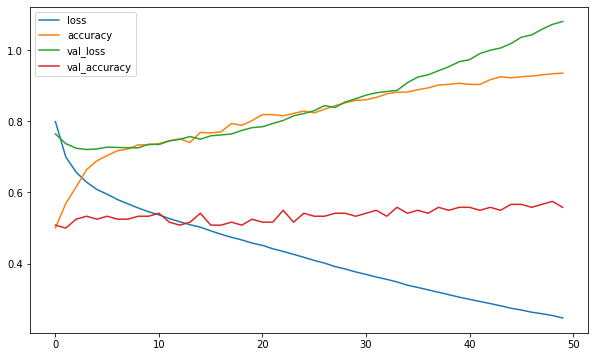

In [131]:
pd.DataFrame(history.history).plot(figsize=(10,6))